# Linearna regresija

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

## Podaci

In [4]:
height=np.array([4.0, 4.5, 5.0, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
weight=np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])

## Treniranje modela korišćenjem formule

$$
w = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

In [5]:
def show_model(model):
    return(f"f(height) = {model[0]} + {model[1]} * height")

In [6]:
N = height.shape[0] # Broj instanci

X = np.ones((N, 2))
X[:, 1] = height
y = weight

w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(show_model(w))

f(height) = -0.47266514806388216 + 10.193621867881543 * height


Dobijenu pravu možemo vizuelizovati.

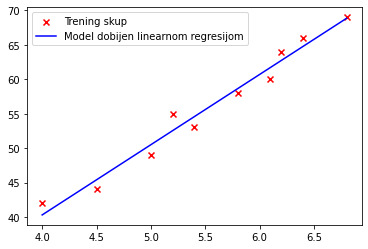

In [7]:
x1 = min(height)
x2 = max(height)
y1 = w[0] + w[1] * x1
y2 = w[0] + w[1] * x2
plt.scatter(height, weight, color="red", marker='x')
plt.plot([x1, x2], [y1, y2], color="blue")
plt.legend(["Trening skup", "Model dobijen linearnom regresijom"])

## Treniranje modela korišćenjem biblioteke

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
def show_model(model):
    return f"f(height) = {model.intercept_} + {model.coef_[0]} * height"

In [10]:
X = pd.DataFrame(height)
y = pd.DataFrame(weight)

In [11]:
model =  LinearRegression()
model.fit(X,y)

model.coef_
print(show_model(model))

f(height) = [-0.47266515] + [10.19362187] * height


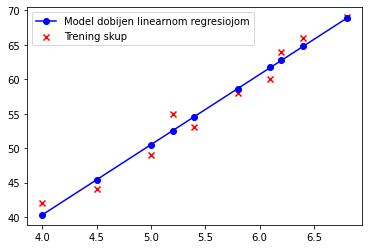

In [12]:
prediction = model.predict(X)
plt.plot(X, prediction, marker='o', color="blue")
plt.scatter(X, y, marker='x', color="red")
plt.legend(["Model dobijen linearnom regresiojom", "Trening skup"])

# Zadatak auto-mpg.csv

## Podaci

In [13]:
df = pd.read_csv("data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [14]:
features = df.columns[1:]
list(features)

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model-year']

## Preprocesiranje

Proveravamo da li postoje nepostojaće vrednosti:

In [15]:
df.isna().any().any()

True

Uklanjamo nepostojaće vrednosti:

In [16]:
df = df.dropna()

## Treniranje modela

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = df["mpg"]
X = df[features]
print(X.shape)
print(y.shape)

(396, 6)
(396,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(277, 6)
(277,)
(119, 6)
(119,)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

-11.817466164696476
[-0.17649337 -0.0009074  -0.00221897 -0.00646204  0.00974422  0.73519636]


## Evaluacija modela

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
test_predict = model.predict(X_test)
train_predict = model.predict(X_train)

In [23]:
print(f"R2 train = {r2_score(y_train, train_predict)}")
print(f"R2 test = {r2_score(y_test, test_predict)}")

R2 train = 0.8103305795388757
R2 test = 0.7922200316993446


In [24]:
print(f"MSE train = {mean_squared_error(y_train, train_predict)}")
print(f"MSE test = {mean_squared_error(y_test, test_predict)}")

MSE train = 12.321714546698447
MSE test = 10.73369307205634


Prosečna greška:

In [25]:
print(f"MSE train = {np.sqrt(mean_squared_error(y_train, train_predict))}")
print(f"MSE test = {np.sqrt(mean_squared_error(y_test, test_predict))}")

MSE train = 3.5102299848725647
MSE test = 3.276231535172131
